In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset and format 

In [76]:
df = pd.read_csv('Admission_Predict.csv')

In [77]:
df.head() #look at dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Don't need the serial number column, so we can get rid of it

In [78]:
df = df.drop(columns = ['Serial No.'])
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Check data for trends

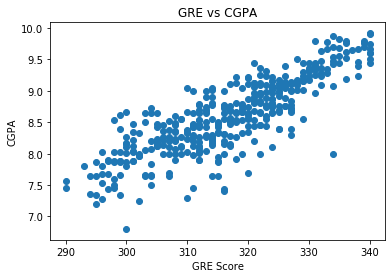

In [79]:
plt.scatter(df['GRE Score'], df['CGPA']);
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.title('GRE vs CGPA')
plt.show()

GRE Scores and CGPA scores appear to be positivly correlated, which means we can all columns for training. Will split later on

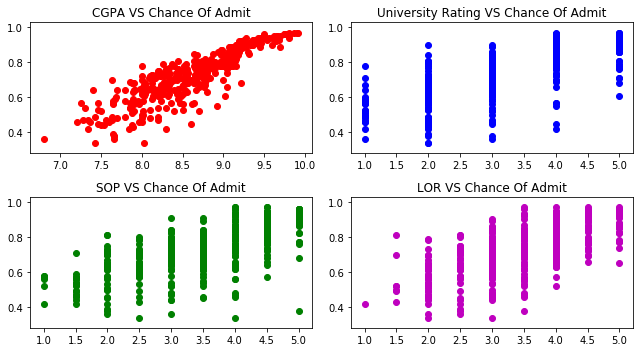

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
df.columns
plt.figure(figsize=(9,5))
plt.subplot(2,2,1)
plt.scatter(df['CGPA'],df['Chance of Admit '],color='r')
plt.title('CGPA VS Chance Of Admit')

plt.subplot(2,2,2)
plt.scatter(df['University Rating'],df['Chance of Admit '],color='b')
plt.title('University Rating VS Chance Of Admit')
#pd.crosstab()

plt.subplot(2,2,3)
plt.scatter(df['SOP'],df['Chance of Admit '],color='g')
plt.title('SOP VS Chance Of Admit')

plt.subplot(2,2,4)
plt.scatter(df['LOR '],df['Chance of Admit '],color='m')
plt.title('LOR VS Chance Of Admit')

plt.tight_layout()
plt.show()

Based off these plots, I am pretty confident my regression models will fit perfectly (no under/over fitting)

## Get my testing and training dataset 

In [81]:
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df.iloc[:,:7]
y = df.iloc[:,-1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)


# Linear Regression

In [82]:
from sklearn import linear_model # only a linear model will be considered
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

#Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
r_score = reg.score(X_test,y_test)

#5-fold cross validation
X_for_Kfold = np.array(X_train)
y_for_Kfold = np.array(y_train)
kf = KFold(n_splits=5)
for i, j in kf.split(X_for_Kfold):
    X_train2, X_test2 = X_for_Kfold[i], X_for_Kfold[j]
    y_train2, y_test2 = y_for_Kfold[i], y_for_Kfold[j]
    
predictions2 = reg.predict(X_test2)
linear = reg.score(X_test,y_test)
linear_5fold = reg.score(X_test2,y_test2)


print("Linear Regression Accuracy: %.4f" % linear)
print("Linear Regression with 5 fold accuracy: %.4f" % linear_5fold)

Linear Regression Accuracy: 0.7400
Linear Regression with 5 fold accuracy: 0.8449


# Random Forest Regressor 

In [83]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#5-fold cross validation
X_for_Kfold = np.array(X_train)
y_for_Kfold = np.array(y_train)
kf = KFold(n_splits=5)
for i, j in kf.split(X_for_Kfold):
    X_train2, X_test2 = X_for_Kfold[i], X_for_Kfold[j]
    y_train2, y_test2 = y_for_Kfold[i], y_for_Kfold[j]
    
predictions3 = regressor.predict(X_test2)
random_forest = regressor.score(X_test,y_test)
random_forest_5fold = regressor.score(X_test2,y_test2)


print("Random Forest Accuracy: %.4f" % random_forest)
print('Random Forest with 5 fold accuracy: %.4f' % random_forest_5fold)

Random Forest Accuracy: 0.7004
Random Forest with 5 fold accuracy: 0.9629


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


# Decision Tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#5-fold cross validation
X_for_Kfold = np.array(X_train)
y_for_Kfold = np.array(y_train)
kf = KFold(n_splits=5)
for i, j in kf.split(X_for_Kfold):
    X_train2, X_test2 = X_for_Kfold[i], X_for_Kfold[j]
    y_train2, y_test2 = y_for_Kfold[i], y_for_Kfold[j]
    
predictions4 = regressor.predict(X_test2)
decision_tree = regressor.score(X_test,y_test)
decision_tree_5fold = regressor.score(X_test2,y_test2)

print("Decision Tree Accuracy: %.4f" % decision_tree)
print('Decision Tree with 5 fold accuracy: %.4f' % decision_tree_5fold)

Decision Tree Accuracy: 0.5719
Decision Tree with 5 fold accuracy: 1.0000


# Support Vector Regression

In [85]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#5-fold cross validation
X_for_Kfold = np.array(X_train)
y_for_Kfold = np.array(y_train)
kf = KFold(n_splits=5)
for i, j in kf.split(X_for_Kfold):
    X_train2, X_test2 = X_for_Kfold[i], X_for_Kfold[j]
    y_train2, y_test2 = y_for_Kfold[i], y_for_Kfold[j]
    
predictions5 = regressor.predict(X_test2)
SVR = regressor.score(X_test,y_test)
SVR_5fold = regressor.score(X_test2,y_test2)



print("Support Vector Regression Accuracy: %.4f" % SVR)
print('Support Vector Regression with 5 fold accuracy: %.4f' % SVR_5fold)

Support Vector Regression Accuracy: 0.5394
Support Vector Regression with 5 fold accuracy: 0.7034


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Comparing the data

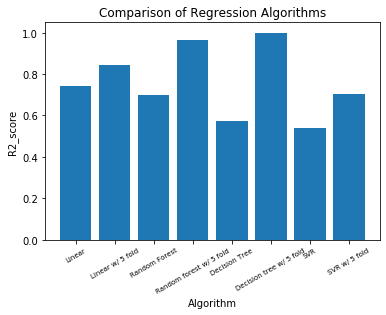

In [86]:
import matplotlib.pyplot as plt

label = ['Linear', 'Linear w/ 5 fold', 
         'Random Forest', 'Random forest w/ 5 fold', 
         'Decision Tree', 'Decision tree w/ 5 fold', 
         'SVR', 'SVR w/ 5 fold']

values = [linear, linear_5fold, 
          random_forest, random_forest_5fold,
          decision_tree, decision_tree_5fold,
          SVR, SVR_5fold]

#plotting for comparison
index = np.arange(len(label))
plt.bar(index, values)
plt.xlabel('Algorithm', fontsize=10)
plt.ylabel('R2_score', fontsize=10)
plt.xticks(index, label, fontsize=7, rotation=30)
plt.title('Comparison of Regression Algorithms')
plt.show()
    

# Conclusion

After comparing my 4 regression models (with and without 5 fold cross validation), it appears as though the decision tree regression model with 5-fold cross validation is the most accurate in prediciting whether or not an Indian student will be admitted to grad school, coming in at a near perfect 100%. Coming in a close second place was the Random Forest regression model, also with 5 fold cross validation, coming in at around 94%. The worst performance was the regular decision tree, coming in at about 50%. 